### Question 1
An undirected graph has twelve nodes. Four of them have degree six, five of them have degree three, three of them have degree seven. What is the number of edges in this graph?

In [1]:
# Graph with 12 nodes:
# 4 nodes with degree 6
# 5 nodes with degree 3
# 3 nodes with degree 7

# Sum of all degrees
degree_sum = 4*6 + 5*3 + 3*7

# Number of edges = sum of degrees / 2
num_edges = degree_sum // 2

print(f"Sum of degrees: {degree_sum}")
print(f"Number of edges: {num_edges}")

Sum of degrees: 60
Number of edges: 30


### Connected Components

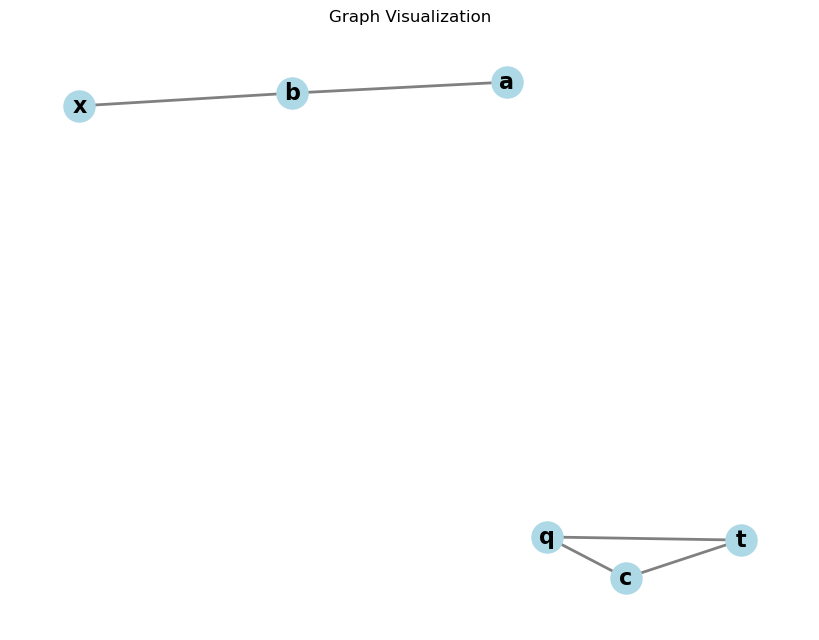

G has 2 connected components
{'b', 'a', 'x'}
{'q', 'c', 't'}


In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = nx.Graph()
G.add_edges_from([('a', 'b'), ('t', 'c'), ('b', 'x'), ('c', 'q'), ('q', 't')])

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', 
        node_size=500, font_size=16, font_weight='bold',
        edge_color='gray', width=2)
plt.title("Graph Visualization")
plt.show()
print("G has {} connected components".format(nx.number_connected_components(G)))
for cc in nx.connected_components(G):
    print(cc)

### Eulerian Cycles

An Eulerian cycle is a path in a graph that visits every edge exactly once and returns to the starting vertex. A directed graph has an Eulerian cycle if every vertex has equal in-degree and out-degree.


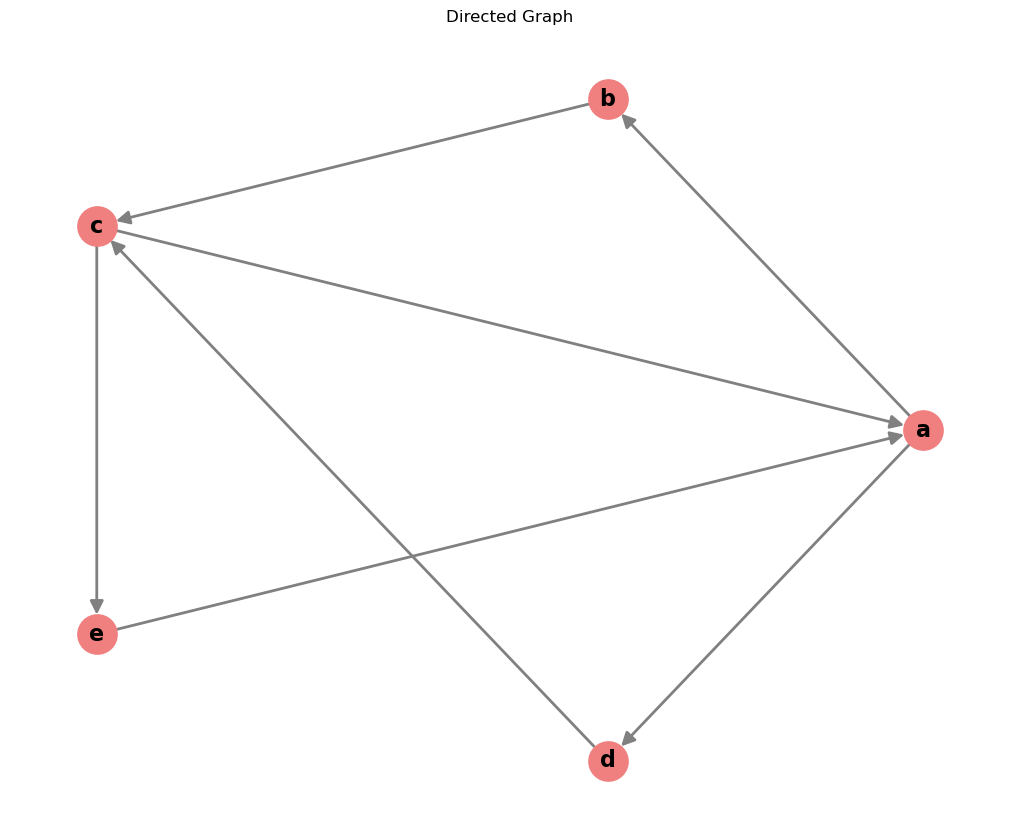

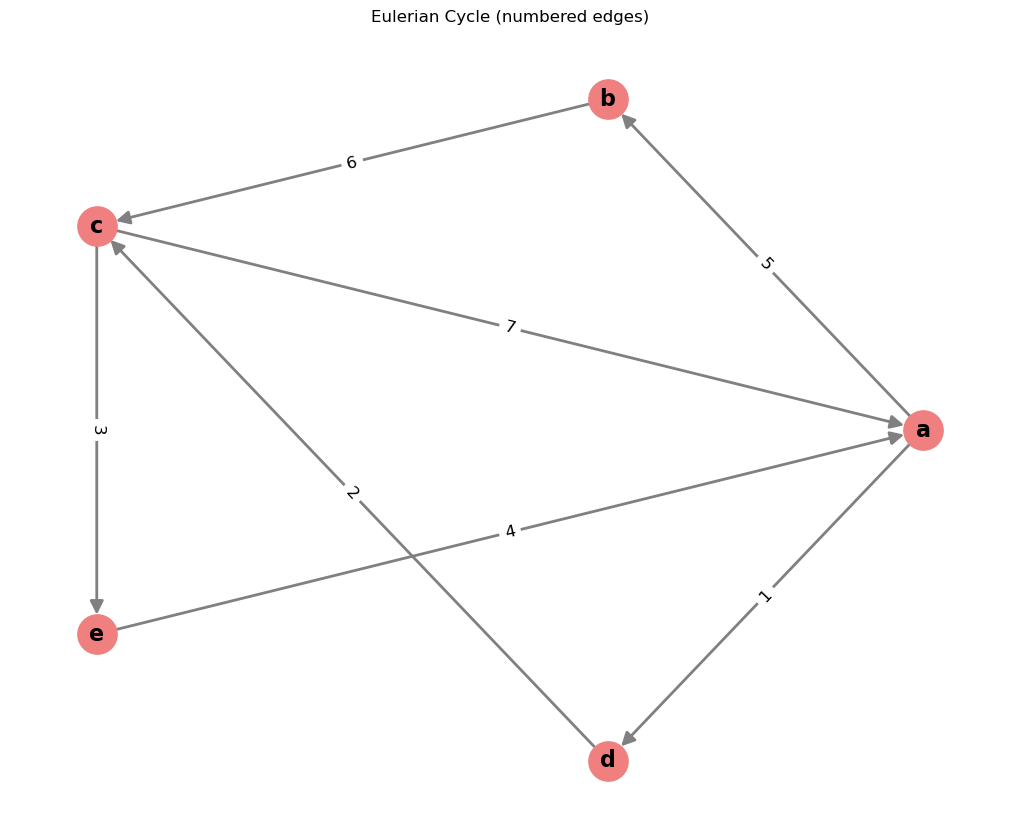

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph([('a', 'b'), ('b', 'c'), ('c', 'e'), ('e', 'a'), ('a', 'd'), ('d', 'c'), ('c', 'a')])

plt.figure(figsize=(10, 8))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightcoral', 
        node_size=800, font_size=16, font_weight='bold',
        arrows=True, arrowsize=20, edge_color='gray', width=2)
plt.title("Directed Graph")
plt.axis('off')
plt.show()

if nx.is_eulerian(G):
    cycle = list(nx.eulerian_circuit(G))
    edge_labels = {}
    for edge_number, e in enumerate(cycle, 1):
        edge_labels[e] = str(edge_number)
    
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightcoral',
            node_size=800, font_size=16, font_weight='bold',
            arrows=True, arrowsize=20, edge_color='gray', width=2)
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=12)
    plt.title("Eulerian Cycle (numbered edges)")
    plt.axis('off')
    plt.show()
else:
    print("There is no Eulerian cycle in this graph")

### Strongly Connected Components

A strongly connected component of a directed graph is a maximal subgraph where every vertex is reachable from every other vertex.


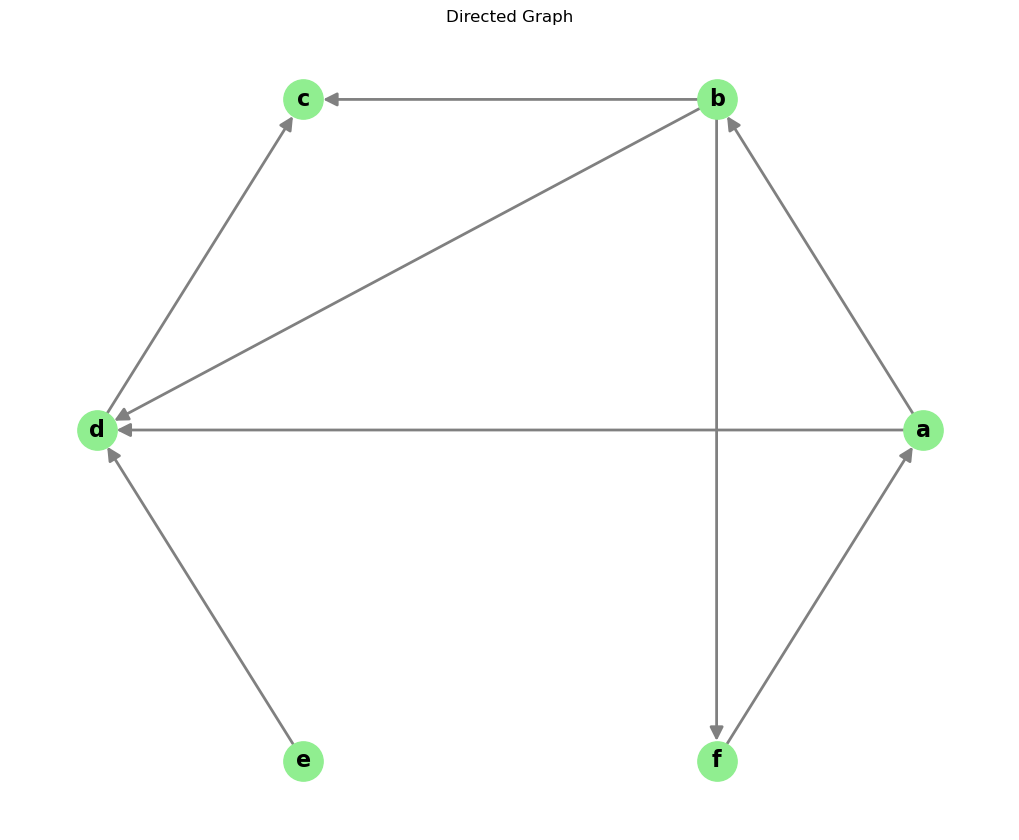

Strongly connected components:
{'c'}
{'d'}
{'b', 'a', 'f'}
{'e'}


In [11]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([('a', 'b'), ('b', 'c'), ('b', 'd'), ('d', 'c'), ('a', 'd'), ('e', 'd'), ('f', 'a'), ('b', 'f')])

plt.figure(figsize=(10, 8))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgreen',
        node_size=800, font_size=16, font_weight='bold',
        arrows=True, arrowsize=20, edge_color='gray', width=2)
plt.title("Directed Graph")
plt.axis('off')
plt.show()

print("Strongly connected components:")
for scc in nx.strongly_connected_components(G):
    print(scc)

### Topological Sort

A topological ordering of a directed acyclic graph (DAG) is a linear ordering of its vertices such that for every directed edge from vertex u to vertex v, u comes before v in the ordering.


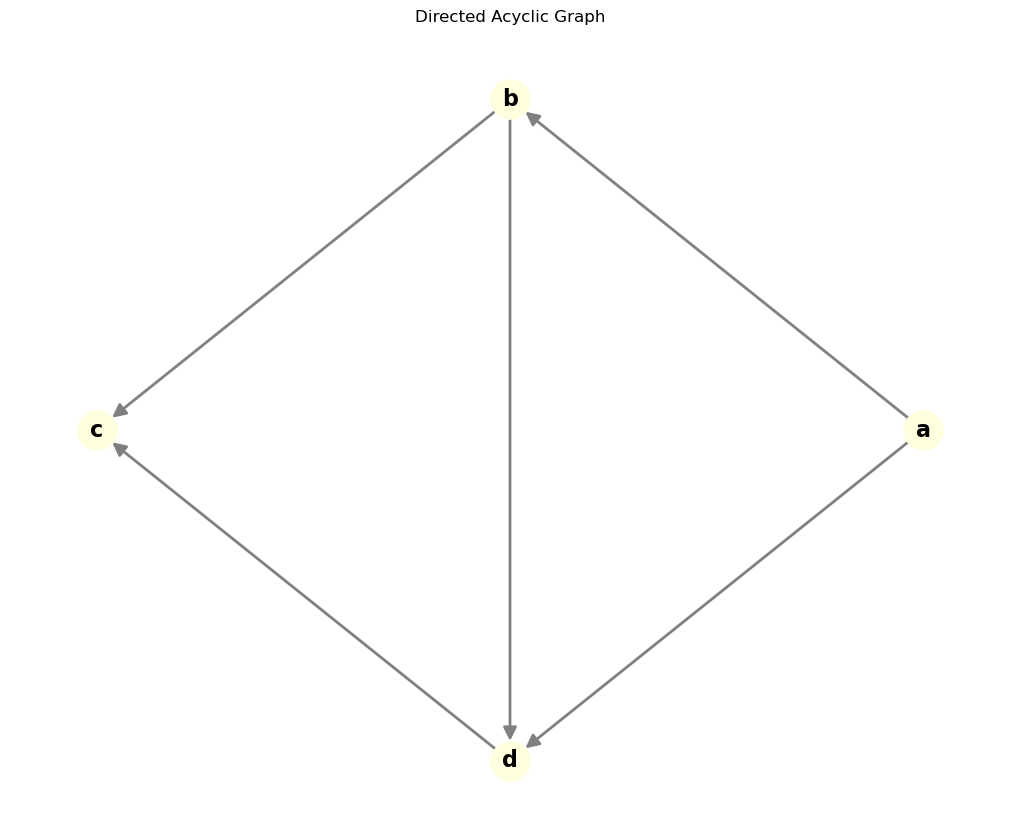

Topological ordering of the nodes: ['a', 'b', 'd', 'c']


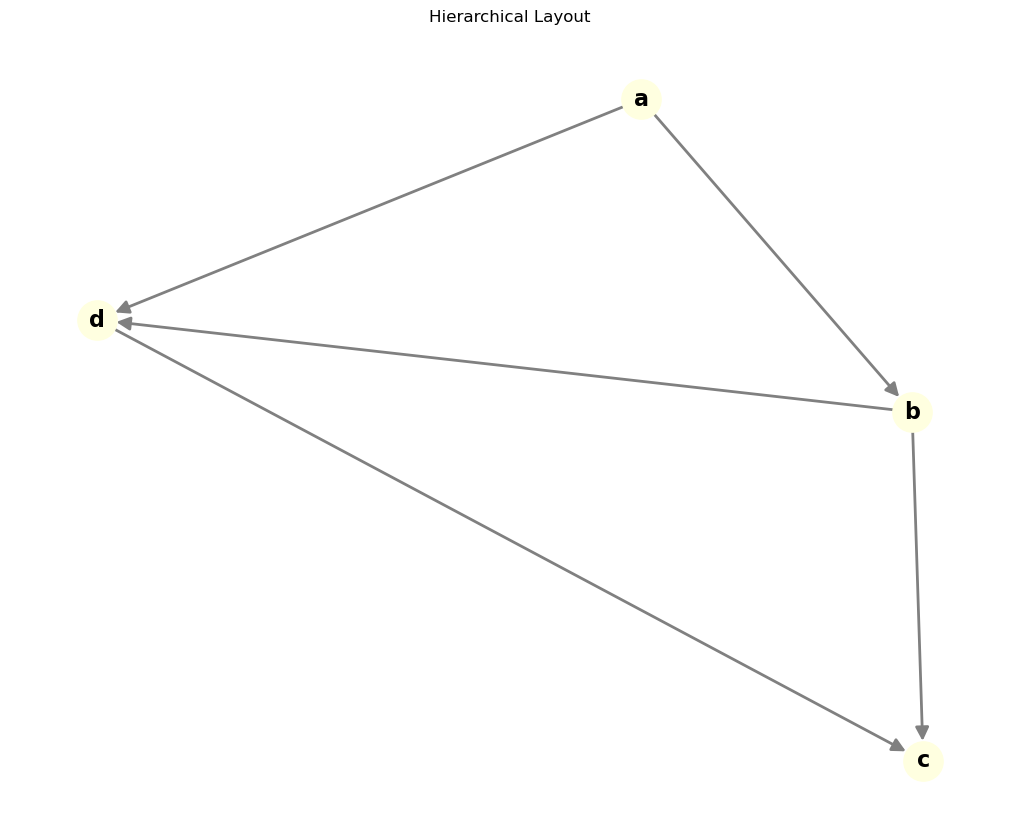

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([('a', 'b'), ('b', 'c'), ('b', 'd'), ('d', 'c'), ('a', 'd')])

plt.figure(figsize=(10, 8))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightyellow',
        node_size=800, font_size=16, font_weight='bold',
        arrows=True, arrowsize=20, edge_color='gray', width=2)
plt.title("Directed Acyclic Graph")
plt.axis('off')
plt.show()

if nx.is_directed_acyclic_graph(G):
    print("Topological ordering of the nodes:", list(nx.topological_sort(G)))
else:
    print("G contains a cycle, hence it cannot be topologically sorted.")

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightyellow',
        node_size=800, font_size=16, font_weight='bold',
        arrows=True, arrowsize=20, edge_color='gray', width=2)
plt.title("Hierarchical Layout")
plt.axis('off')
plt.show()

### Guarini Solver

Guarini's problem: Can two white knights and two black knights on a 3x3 chessboard switch positions? This is solved by modeling the problem as a graph where nodes represent configurations and edges represent valid knight moves.


In [14]:
import networkx as nx
import itertools as it

G = nx.Graph()
for wb_indices in it.permutations(range(8), 4):
    configuration = ['*'] * 8
    configuration[wb_indices[0]] = 'W'
    configuration[wb_indices[1]] = 'W'
    configuration[wb_indices[2]] = 'B'
    configuration[wb_indices[3]] = 'B'
    G.add_node("".join(configuration))

moves = [[] for _ in range(8)]
moves[0] = [4, 6]
moves[1] = [5, 7]
moves[2] = [3, 6]
moves[3] = [2, 7]
moves[4] = [0, 5]
moves[5] = [1, 4]
moves[6] = [0, 2]
moves[7] = [1, 3]

for node in G.nodes():
    configuration = [c for c in node]
    for i in range(8):
        if configuration[i] != "*":
            for new_pos in moves[i]:
                if configuration[new_pos] != "*":
                    continue
                new_configuration = list(configuration)
                new_configuration[i] = "*"
                new_configuration[new_pos] = configuration[i]
                if not G.has_edge("".join(configuration), "".join(new_configuration)):
                    G.add_edge("".join(configuration), "".join(new_configuration))

print("Number of nodes:", nx.number_of_nodes(G))
print("Number of edges:", nx.number_of_edges(G))
print("Number of connected components:", nx.number_connected_components(G))

assert "W*B**W*B" in nx.node_connected_component(G, "W*W**B*B")
assert "B*B**W*W" in nx.node_connected_component(G, "W*W**B*B")
assert "W*B**B*W" not in nx.node_connected_component(G, "W*W**B*B")

path = nx.shortest_path(G, "W*W**B*B", "B*B**W*W")
print(f"Shortest path length: {len(path) - 1} moves")
print("Path:", " -> ".join(path))

Number of nodes: 420
Number of edges: 960
Number of connected components: 2
Shortest path length: 16 moves
Path: W*W**B*B -> WBW**B** -> WBW*B*** -> *BW*B*W* -> BBW***W* -> B*W**BW* -> B*W*B*W* -> B**WB*W* -> B*WWB*** -> **WWB*B* -> B*WW**B* -> B*W***BW -> BWW***B* -> BW*W**B* -> BWBW**** -> BWB****W -> B*B**W*W
